In [13]:
import os
import re
import matplotlib.pyplot as plt

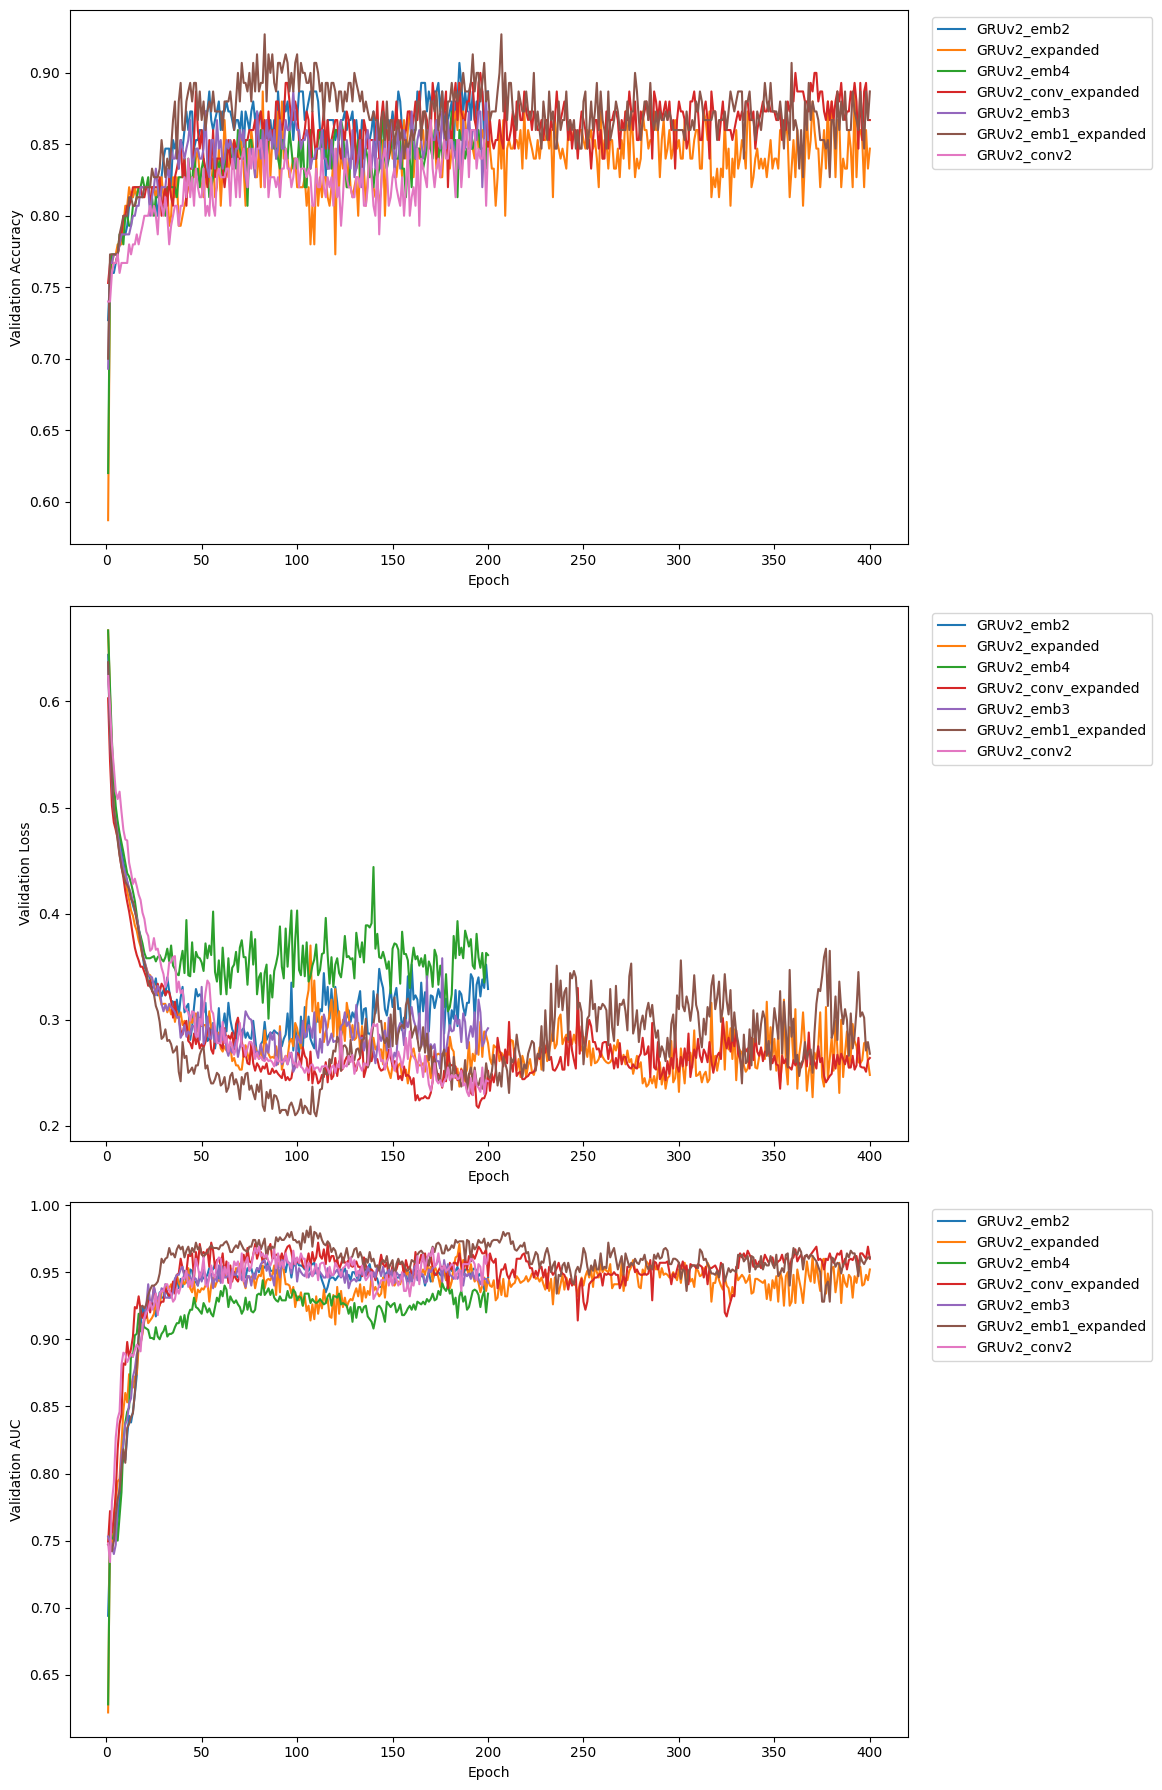

In [14]:
def extract_val_metrics_from_file(file_path):
    epochs = []
    val_accuracy = []
    val_loss = []
    val_auc = []
    
    with open(file_path, 'r') as f:
        for line in f:
            match = re.match(r"Epoch (\d+): VAL Accuracy = ([\d\.]+) Loss = ([\d\.]+) AUC = ([\d\.]+)", line)
            if match:
                epoch, acc, loss, auc = match.groups()
                epochs.append(int(epoch))
                val_accuracy.append(float(acc))
                val_loss.append(float(loss))
                val_auc.append(float(auc))
    
    return epochs, val_accuracy, val_loss, val_auc

def plot_metrics(log_folder, file_prefix=""):
    all_epochs, all_acc, all_loss, all_auc = [], [], [], []
    file_names = []
    
    for file in os.listdir(log_folder):
        if file.endswith(".txt") and file.startswith(file_prefix):
            file_path = os.path.join(log_folder, file)
            epochs, acc, loss, auc = extract_val_metrics_from_file(file_path)
            all_epochs.append(epochs)
            all_acc.append(acc)
            all_loss.append(loss)
            all_auc.append(auc)
            file_names.append(file.split(".")[0])
    
    plt.figure(figsize=(12, 18))
    
    plt.subplot(3, 1, 1)
    for i in range(len(all_epochs)):
        plt.plot(all_epochs[i], all_acc[i], label=file_names[i])
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    
    plt.subplot(3, 1, 2)
    for i in range(len(all_epochs)):
        plt.plot(all_epochs[i], all_loss[i], label=file_names[i])
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    
    plt.subplot(3, 1, 3)
    for i in range(len(all_epochs)):
        plt.plot(all_epochs[i], all_auc[i], label=file_names[i])
    plt.xlabel('Epoch')
    plt.ylabel('Validation AUC')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    
    plt.tight_layout()
    plt.show()

# Set the folder containing log files
log_folder = "./logs"
file_prefix = "GRUv2"
plot_metrics(log_folder, file_prefix)